# Exemplo de reamostragem das partículas

In [1]:
import numpy as np

import projeto_pf # Seu trabalho vai aqui
import inspercles
from pf import draw_random_sample

import sys
if (sys.version_info > (3, 0)):
    import importlib
    importlib.reload(projeto_pf) # Para garantir que o Jupyter sempre relê seu trabalho
else:
    reload(projeto_pf)

%matplotlib inline



Using scikit-learn to compute nearest neighbors


## Criação das partículas e do robô

In [2]:

particulas = projeto_pf.cria_particulas()
robot = projeto_pf.robot

    
    
    
    

## Mapa com posição inicial

Este desenho é só ilustrativo, você não vai precisar chamar o código de desenho no projeto. Somente precisa criar as funções adequadas em `projeto_pf.py`.

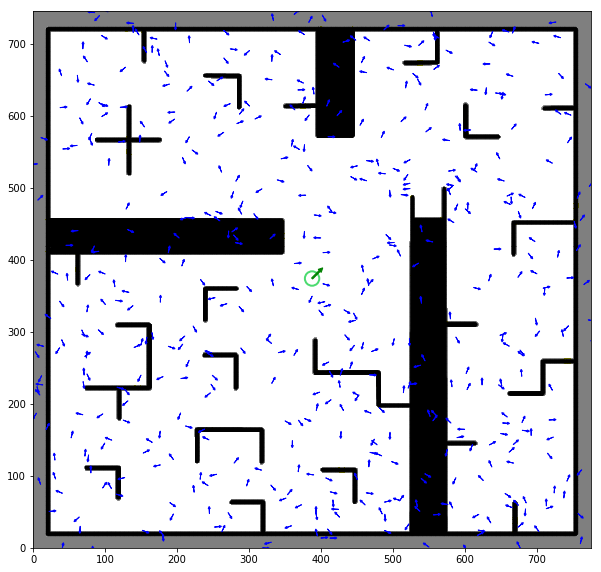

In [3]:
inspercles.nb_draw_map(inspercles.color_image, particles = particulas, pose=robot.pose(), robot=True)

Vamos tornar a distribuição de probabilidade nas partículas bem desequilibrada para observarmos a reamostragem

In [4]:
particulas[0].w = 0.8   # a primeira recebe 80% da probabilidade
for i in range(1, 10):
    particulas[i].w = 0.2/9.0 # As subsequentes 1/9 do que sobrou (20%)

In [5]:
# Vamos separar a informação de posição das partículas para que possamos "ver"  as partículas
particulas_exp = [[p.x, p.y, p.theta] for p in particulas]

particulas_pesos = [p.w for p in particulas]

In [6]:
particulas_exp

[[332.0254644763187, 650.0825937740118, 3.0187591270164136],
 [390.38930615642585, 462.3071841358331, -0.14113176342294187],
 [410.6812927109125, 258.1104061848561, 3.618178320461457],
 [432.8459706089818, 295.95169023808523, -0.8509234978309272],
 [317.95523052435897, 498.60692914815513, 3.6925767696491],
 [522.7522693176081, 290.6494836045459, -1.5609866202643958],
 [403.98830990812644, 334.85907345812757, 0.2790595097573165],
 [411.54511275269647, 245.53634944802002, -1.0777528705722534],
 [751.4977645598603, 453.4187932899959, -1.3166294650536359],
 [61.372416342420365, 558.8728704821112, 3.2293948084618496],
 [500.73795598274603, 663.7086137934995, 2.785554503094466],
 [684.975496320866, 62.21215021015813, 2.0029672137316226],
 [461.27997302945283, 59.459487694793054, 2.3796394145572037],
 [139.10562587234676, 715.5420651504099, 1.5985742460328565],
 [661.5763289192116, 279.92929012884633, 2.635690935761734],
 [470.0252462014677, 272.50576737905345, 0.3901758588422921],
 [732.5753

Vejam como está a distribuição dos pesos

In [7]:
particulas_pesos

[0.8,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 

## Fazendo a reamostragem

Vamos criar novas partículas reamostrando usando a função `pf.draw_random_sample`

In [8]:
novas_particulas = draw_random_sample(particulas, particulas_pesos, 10)

A probabilidade que está em peso agora o sentido. Precisamos fazer com que todos os pesos novamente virem w=1  (ou $1/n$ como na folha de papel, tanto faz desde que todas fiquem iguais)

In [9]:
for p in novas_particulas:
    p.w = 1

O array *novas_particulas* contém as partículas depois da reamostragem. 

## Depois da reamostragem

Vamos observar os valores das partículas

In [10]:
valores_novas_particulas = [[p.x, p.y, p.theta] for p in novas_particulas]

Observem com a partícula que na geração anterior tinha $80\%$ de probabilidade é muito mais comum agora


**<font color=red>Note que para o projeto a partícula precisa sofrer uma pequena mutação</font>**

In [11]:
valores_novas_particulas

[[332.0254644763187, 650.0825937740118, 3.0187591270164136],
 [317.95523052435897, 498.60692914815513, 3.6925767696491],
 [332.0254644763187, 650.0825937740118, 3.0187591270164136],
 [332.0254644763187, 650.0825937740118, 3.0187591270164136],
 [332.0254644763187, 650.0825937740118, 3.0187591270164136],
 [332.0254644763187, 650.0825937740118, 3.0187591270164136],
 [332.0254644763187, 650.0825937740118, 3.0187591270164136],
 [410.6812927109125, 258.1104061848561, 3.618178320461457],
 [332.0254644763187, 650.0825937740118, 3.0187591270164136],
 [332.0254644763187, 650.0825937740118, 3.0187591270164136]]

![](animated.gif)